In [1]:
import numpy as np
%pylab inline
np.random.seed(27)
import pymc3 as pm

Populating the interactive namespace from numpy and matplotlib


In [2]:
alpha, sigma = 1, 1
beta = [1, 2.5]
size = 100
X1 = np.linspace(0, 1, size)
X2 = np.linspace(0,.2, size)
Y = alpha + beta[0]*X1 + beta[1]*X2 + np.random.randn(size)*sigma

In [3]:
#define model
#X1とX2でYを線形回帰するモデル
#modelという名前のモデルを定義する，という意味
with pm.Model() as model:

    # Priors for unknown model parameters
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=10, shape=2)
    sigma = pm.HalfNormal('sigma', sd=1)

    # Expected value of outcome
    mu = alpha + beta[0]*X1 + beta[1]*X2

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal('Y_obs', mu=mu, sd=sigma, observed=Y)

In [5]:
from scipy import optimize
with model:
    # obtain starting values via MAP
    start = pm.find_MAP(method="powell")
    # instantiate sampler
    step = pm.Slice(vars=[sigma])
    # draw 5000 posterior samples
    trace = pm.sample(5000, start=start, step=step)

/Users/masamasakobakoba/.pyenv/versions/miniconda3-4.7.12/lib/python3.7/site-packages/scipy/optimize/_minimize.py:523: RuntimeWarning: Method powell does not use gradient information (jac).
  RuntimeWarning)


/Users/masamasakobakoba/.pyenv/versions/miniconda3-4.7.12/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [sigma]
>NUTS: [beta, alpha]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 37 seconds.
The acceptance probability does not match the target. It is 0.8820282284099575, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8803256922171305, but should be close to 0.8. Try to increase the number of tuning steps.


/Users/masamasakobakoba/.pyenv/versions/miniconda3-4.7.12/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  """Entry point for launching an IPython kernel.
/Users/masamasakobakoba/.pyenv/versions/miniconda3-4.7.12/lib/python3.7/site-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<AxesSubplot:title={'center':'alpha'}>,
        <AxesSubplot:title={'center':'alpha'}>],
       [<AxesSubplot:title={'center':'beta'}>,
        <AxesSubplot:title={'center':'beta'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

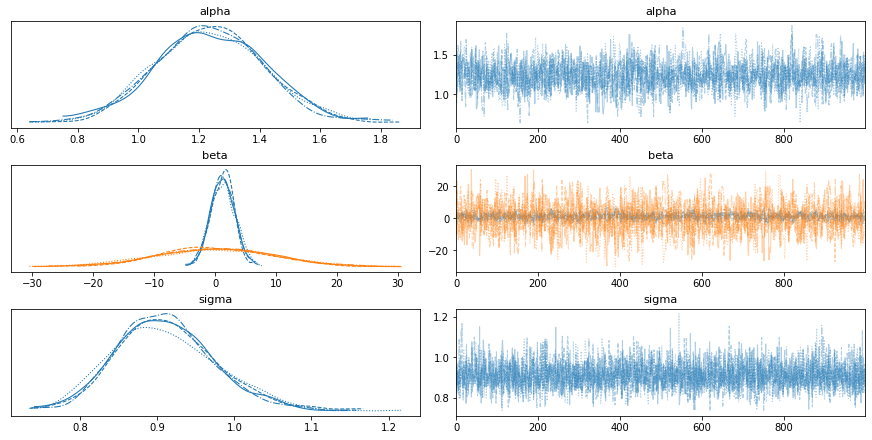

In [6]:
pm.traceplot(trace[4000:])

In [7]:
pm.summary(trace[4000:])

/Users/masamasakobakoba/.pyenv/versions/miniconda3-4.7.12/lib/python3.7/site-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,1.237,0.179,0.889,1.554,0.004,0.003,1783.0,1495.0,1.0
beta[0],1.216,1.946,-2.280,4.967,0.056,0.041,1208.0,1459.0,1.0
beta[1],0.067,9.615,-18.523,17.668,0.276,0.195,1214.0,1408.0,1.0
sigma,0.911,0.065,0.794,1.036,0.001,0.001,3872.0,3139.0,1.0
